# IMPORT LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Import Data From csv Files
gdp_data = pd.read_csv('all_data.csv')
print(gdp_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
#Data summary and data type check
print(gdp_data.describe())
print(gdp_data.info())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 n

# CONVERT GDP INTO TRILLIONS

In order to make data for accessible, convert the gdp data into trillions.

Note: Trillions abbr. is "T".


In [4]:
gdp_data['GDP_T'] = np.round(gdp_data.GDP/10**12,2)
print(gdp_data.head(5))

  Country  Year  Life expectancy at birth (years)           GDP  GDP_T
0   Chile  2000                              77.3  7.786093e+10   0.08
1   Chile  2001                              77.3  7.097992e+10   0.07
2   Chile  2002                              77.8  6.973681e+10   0.07
3   Chile  2003                              77.9  7.564346e+10   0.08
4   Chile  2004                              78.0  9.921039e+10   0.10


# SEPARATE THE DATA BY COUNTRY

We will be using the Country Abbreviations from "https://sustainablesources.com/"
As an example, here are some of them :

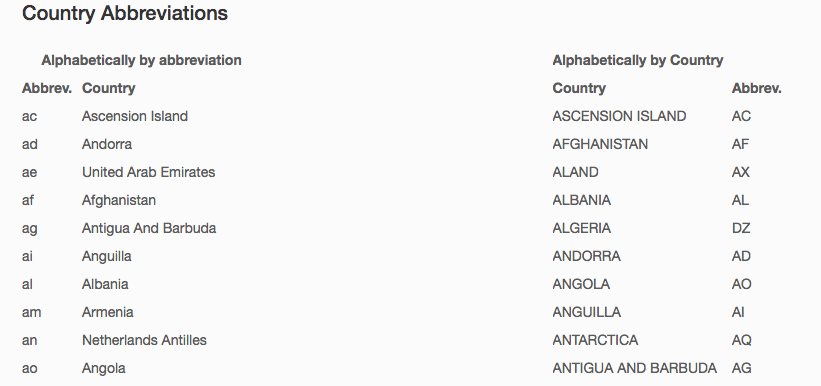

In [5]:
#Check all the countries
unique_countries = gdp_data.Country.unique()
print(unique_countries)
#Check the number of years covered by the dataset
unique_years = gdp_data.Year.unique()
print(unique_years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [6]:
#GDP China
gdp_cn = gdp_data[gdp_data.Country == 'China']
#GDP Chile
gdp_cl = gdp_data[gdp_data.Country == 'Chile']
#GDP Germany
gdp_de = gdp_data[gdp_data.Country == 'Germany']
#GDP Mexico
gdp_mx = gdp_data[gdp_data.Country == 'Mexico']
#GDP USA
gdp_us = gdp_data[gdp_data.Country == 'United States of America']
#GDP Zimbabwe
gdp_zw = gdp_data[gdp_data.Country == 'Zimbabwe']

# Exploring the shape of the dataset

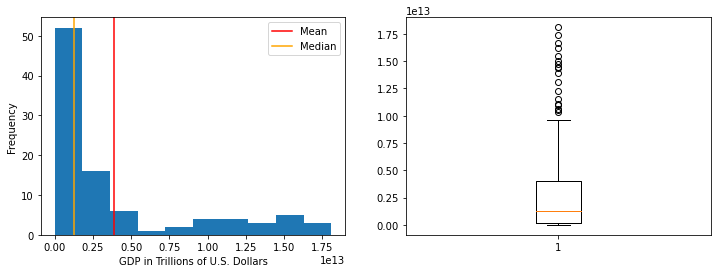

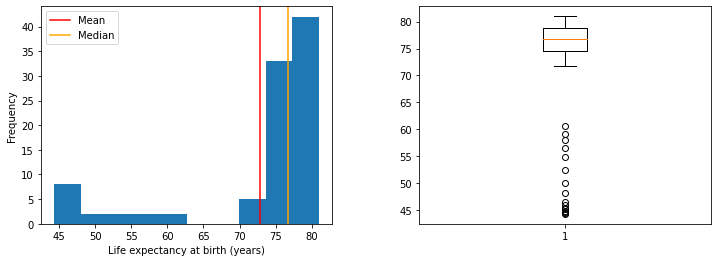

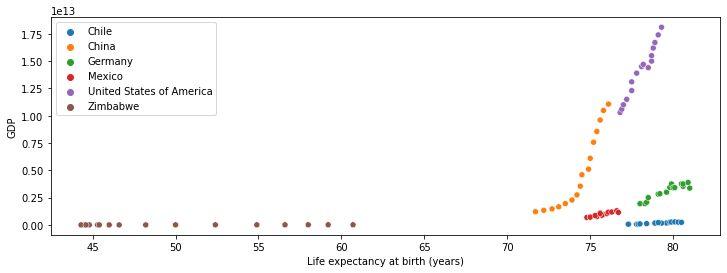

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(gdp_data.GDP)
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.ylabel('Frequency')
plt.axvline(np.mean(gdp_data.GDP), color='r', label='Mean')
plt.axvline(np.median(gdp_data.GDP), color='orange', label='Median')
plt.legend()

plt.subplot(1,2,2)
plt.boxplot(gdp_data.GDP)
plt.show()

plt.close()
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(gdp_data['Life expectancy at birth (years)'])
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Frequency')
plt.axvline(np.mean(gdp_data['Life expectancy at birth (years)']), color='r', label='Mean')
plt.axvline(np.median(gdp_data['Life expectancy at birth (years)']), color='orange', label='Median')
plt.legend()

plt.subplot(1,2,2)
plt.boxplot(gdp_data['Life expectancy at birth (years)'])

plt.subplots_adjust(wspace=0.3)
plt.show()

plt.close()
plt.figure(figsize=(12,4))

sns.scatterplot(x=gdp_data['Life expectancy at birth (years)'], y=gdp_data.GDP, hue=gdp_data.Country)
plt.legend()
plt.show()

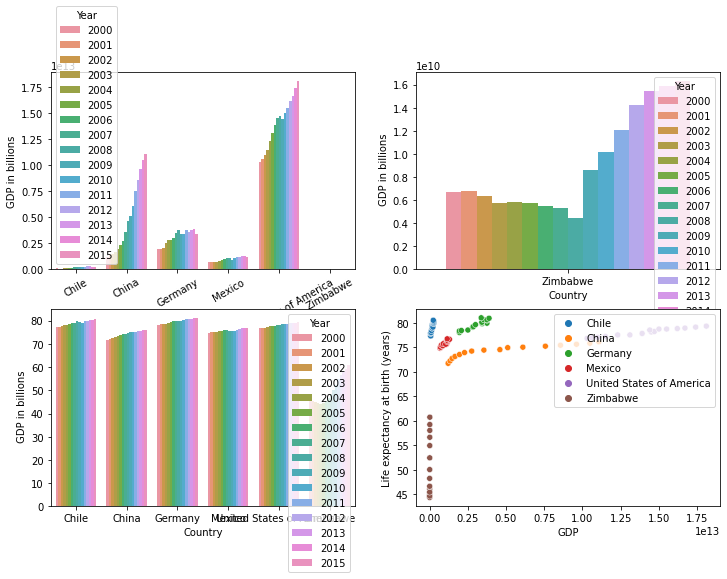

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12,8), sharey=False)
#plot 1
sns.barplot(ax=axs[0,0], data=gdp_data, x= 'Country', y='GDP', hue='Year')
axs[0,0].set_xticks(range(6))
axs[0,0].set_xticklabels(gdp_data['Country'].unique(), rotation=30)
axs[0,0].set_ylabel("GDP in billions")
#plot 2
sns.barplot(ax=axs[0,1], data=gdp_data, x= gdp_data[gdp_data['Country'] == 'Zimbabwe']['Country'], y='GDP', hue='Year')
axs[0,1].set_ylabel(" GDP in billions")
#plot 3
sns.barplot(ax=axs[1,0], data=gdp_data, x= 'Country', y= 'Life expectancy at birth (years)', hue='Year')
axs[1,0].set_ylabel(" GDP in billions")
#plot 4
sns.scatterplot(ax=axs[1,1], x = gdp_data["GDP"], y = gdp_data['Life expectancy at birth (years)'], hue = gdp_data["Country"])
plt.legend(loc=1)
plt.show()